# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

In [17]:
import scipy.optimize as optimize

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

## Dane wejściowe

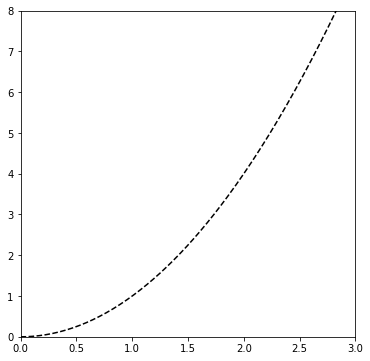

In [3]:
f = lambda x: (x**2)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

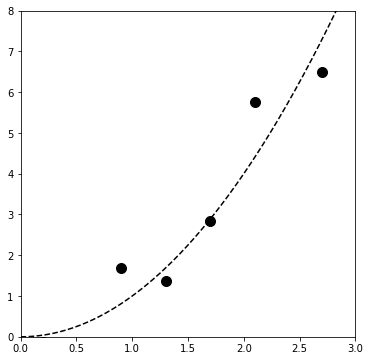

In [5]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

## Regresja liniowa z scipy (minimalizacja metodą gradientową dla błędu kwadratowego)

In [6]:
# We create the model. # minimalizacje metodą gradientową dla błędu kwadratowego
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[ 3.01844594]
-1.67321585229


Definiujemy naszą funkcję regresji

In [7]:
f_lr = lambda x: lr.coef_ * x +lr.intercept_

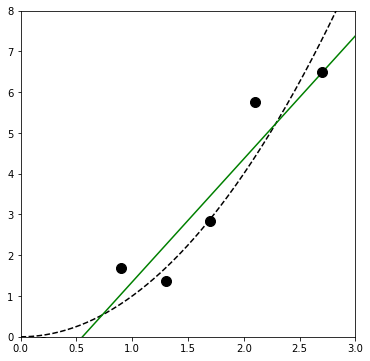

In [8]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [9]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

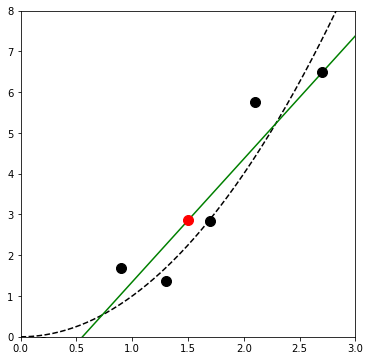

In [10]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [11]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.907079583106
0.897560899149


## Regrecja liniowa - rozwiązanie analityczne dle błedu kwadratowego
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [12]:
deg=1
xx=np.vander(x, deg + 1)
xx

array([[ 0.2,  1. ],
       [ 0.5,  1. ],
       [ 0.8,  1. ],
       [ 0.9,  1. ],
       [ 1.3,  1. ],
       [ 1.7,  1. ],
       [ 2.1,  1. ],
       [ 2.7,  1. ]])

In [13]:
A_T_A = np.dot(np.transpose(xx),xx)

In [14]:
w = np.linalg.solve(A_T_A,np.dot(xx.T,y))
print(w)

[ 3.01844594 -1.67321585]


## Gradientowo minimalizujemy funkcję kosztów dla f kwadratowej
Zdafiniuj funkcję opisującą błąd kwadratowy:
$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [15]:
def error(par):
    a,b=par
    return np.sum((y-(a*x + b))**2)

# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [30]:
x0=np.asarray((0,0))
y_2 = optimize.fmin_cg(error,x0)
y_2

Optimization terminated successfully.
         Current function value: 78.562753
         Iterations: 3
         Function evaluations: 24
         Gradient evaluations: 6


array([-0.45129596,  3.18917189])

# Zadanie 5
## Gradientowo minimalizujemy funkcję kosztów dla f mod (można to zrobić tylko gradientowo)
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [19]:
def error1(par):
    a,b = par
    return np.sum(np.abs(y-(a*x+b)))

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [31]:
x0=np.asarray((0,0))
y_mod = optimize.fmin_cg(error1,x0)
y_mod

         Current function value: 10.781556
         Iterations: 5
         Function evaluations: 168
         Gradient evaluations: 39


array([ 1.0919959 , -0.00906003])

# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


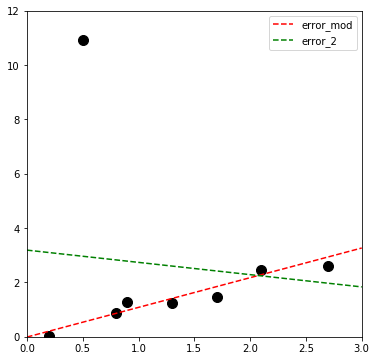

In [32]:
f = lambda x: (x)
f1 = lambda x: y_mod[0] * x + y_mod[1]
f2 = lambda x: y_2[0] * x + y_2[1]

x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y1 = f1(x_tr) 
y2 = f2(x_tr) 
y[1]=y[1]+10
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])

plt.plot(x, y, 'ok', ms=10);
plt.plot(x_tr, y1, '--r',label="error_mod");
plt.plot(x_tr, y2, '--g',label="error_2");
plt.legend()
plt.show()

In [ ]:
points = np.column_stack((x,y))

## Wniosek: 
* minimalizacja gradientowa funkcji błędu z kwadratem jest wrażliwa na wartości odstające, 
* funkcja błędu z modułem jest mniej wrażliwa na wartości odstające
* funkcja mod jest nieróżniczkowalna, więc znalezienie jej minimum tylko przez numeryczne minimalizowanie gradientu, brak rozwiązania analitycznego